### Importing libraries

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Renaming columns

In [35]:
df = pd.read_csv('archive/caracteristics.csv', encoding='ISO-8859-1')

columns = {"Num_Acc":"accident_ID",
          "an":"year",
          "mois":"month",
          "jour":"day",
          "hrmn":"time",
          "lum":"lighting",
          "agg":"agg",
          "int":"intersection",
          "atm":"atmosphere",
          "col":"collision",
          "com":"municipality",
          "adr":"postal_address",
          "gps":"GPS",
          "lat":"latitude",
          "long":"longitude",
          "dep":"department"}

df.rename(columns=columns, inplace=True)

In [343]:
# Dropping some irrelevant columns
df.drop(columns=["agg", "department", "municipality"], inplace=True)

In [344]:
df.head()

accident_ID  year  month  day  time  lighting  intersection  atmosphere  \
0  201600000001    16      2    1  1445         1             1         8.0   
1  201600000002    16      3   16  1800         1             6         1.0   
2  201600000003    16      7   13  1900         1             1         1.0   
3  201600000004    16      8   15  1930         2             1         7.0   
4  201600000005    16     12   23  1100         1             3         1.0   

   collision       postal_address GPS  latitude longitude  
0        3.0   46, rue Sonneville   M       0.0       0.0  
1        6.0  1a rue du cimetière   M       0.0       0.0  
2        6.0                  NaN   M       0.0       0.0  
3        3.0   52 rue victor hugo   M       0.0       0.0  
4        3.0     rue Joliot curie   M       0.0       0.0

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   accident_ID     839985 non-null  int64  
 1   year            839985 non-null  int64  
 2   month           839985 non-null  int64  
 3   day             839985 non-null  int64  
 4   time            839985 non-null  int64  
 5   lighting        839985 non-null  int64  
 6   intersection    839985 non-null  int64  
 7   atmosphere      839930 non-null  float64
 8   collision       839974 non-null  float64
 9   postal_address  699443 non-null  object 
 10  GPS             366226 non-null  object 
 11  latitude        362471 non-null  float64
 12  longitude       362467 non-null  object 
dtypes: float64(3), int64(7), object(3)
memory usage: 83.3+ MB


In [346]:
# Creating the localisation column
df["localisation"] = df["postal_address"].isnull()

### Mapping of feature's values

In [347]:
localisation_map = {True:"Out of agglomeration", False:"In built-up areas"}

lighting_map = {1:"Full day", 2:"Twilight or dawn", 3:"Night without public lighting",
            4:"Night with public lighting not lit", 5:"Night with public lighting on"}

intersection_map ={1:"Out of intersection", 2:"X Intersection", 3:" T Intersection",
                   4:"Y Intersection", 5:"More than 4 branches", 6:"Giratory",
                   7:"Place", 8:"Level crossing", 9:"Other intersection"}

atmosphere_map = {1:"Normal", 2:"Light rain", 3:"Heavy rain",
                  4:"Snow - hail", 5:"Fog - smoke", 6:"Strong wind - storm",
                  7:"Dazzling weather", 8:"Cloudy weather", 9:"Other"}

collision_map = {1:"Frontal", 2:"Rear", 3:"By the side", 4:"Chain",
                 5:"Multiple", 6:"Other", 7:"Without"}

GPS_map = {"M":"Métropole", "A":"Antilles (Martinique or Guadeloupe)",
           "G":"Guyane", "R":"Réunion", "Y":"Mayotte"}

df["localisation"] = df["localisation"].map(localisation_map)
df["lighting"] = df["lighting"].map(lighting_map)
df["intersection"] = df["intersection"].map(intersection_map)
df["atmosphere"] = df["atmosphere"].map(atmosphere_map)
df["collision"] = df["collision"].map(collision_map)
df["GPS"] = df["GPS"].map(GPS_map)

### Handling date and time

In [348]:
# Combine day, month and year to a datetime type
df["date"] = pd.to_datetime(df["day"].astype(str) + "/" + df["month"].astype(str) + "/" + df["year"].astype(str))
df.drop(columns=["day", "month", "year"], inplace=True)

# Move the column to the front
df.insert(1, "date", df.pop("date"))

df.head()

accident_ID       date  time          lighting         intersection  \
0  201600000001 2016-01-02  1445          Full day  Out of intersection   
1  201600000002 2016-03-16  1800          Full day             Giratory   
2  201600000003 2016-07-13  1900          Full day  Out of intersection   
3  201600000004 2016-08-15  1930  Twilight or dawn  Out of intersection   
4  201600000005 2016-12-23  1100          Full day       T Intersection   

         atmosphere    collision       postal_address        GPS  latitude  \
0    Cloudy weather  By the side   46, rue Sonneville  Métropole       0.0   
1            Normal        Other  1a rue du cimetière  Métropole       0.0   
2            Normal        Other                  NaN  Métropole       0.0   
3  Dazzling weather  By the side   52 rue victor hugo  Métropole       0.0   
4            Normal  By the side     rue Joliot curie  Métropole       0.0   

  longitude          localisation  
0       0.0     In built-up areas  
1       0.0     In built-up areas  
2       0.0  Out of agglomeration  
3       0.0     In built-up areas  
4       0.0     In built-up areas

In [349]:
df['time'] = df['time'].astype(str)

hour = df['time'].apply(lambda x: x[:-2])
minute = df['time'].apply(lambda x: x[-2:])

df.insert(2, "hour", hour)
df.insert(3, "minute", minute)

# Filling in missing hour values
df["hour"].replace(to_replace="", value="0", inplace=True)
df[df["hour"]==""].shape

df.drop(columns=["time"], inplace=True)
df.head()

accident_ID       date hour minute          lighting         intersection  \
0  201600000001 2016-01-02   14     45          Full day  Out of intersection   
1  201600000002 2016-03-16   18     00          Full day             Giratory   
2  201600000003 2016-07-13   19     00          Full day  Out of intersection   
3  201600000004 2016-08-15   19     30  Twilight or dawn  Out of intersection   
4  201600000005 2016-12-23   11     00          Full day       T Intersection   

         atmosphere    collision       postal_address        GPS  latitude  \
0    Cloudy weather  By the side   46, rue Sonneville  Métropole       0.0   
1            Normal        Other  1a rue du cimetière  Métropole       0.0   
2            Normal        Other                  NaN  Métropole       0.0   
3  Dazzling weather  By the side   52 rue victor hugo  Métropole       0.0   
4            Normal  By the side     rue Joliot curie  Métropole       0.0   

  longitude          localisation  
0       0.0     In built-up areas  
1       0.0     In built-up areas  
2       0.0  Out of agglomeration  
3       0.0     In built-up areas  
4       0.0     In built-up areas

### Checking for missing values

In [350]:
def check_missing_val(df):
    for column in df.columns:
        null_count = df.isnull()[column].sum()

        # Skips over complete coloumns
        if null_count == 0:
            continue

        total_count = df[column].shape[0]
        percentage = (null_count / total_count) * 100

        print(f'Percentage of missing values in {column}: {percentage}')
    
check_missing_val(df)

Percentage of missing values in intersection: 0.012619272963207678
Percentage of missing values in atmosphere: 0.006547735971475681
Percentage of missing values in collision: 0.0013095471942951363
Percentage of missing values in postal_address: 16.731489252784275
Percentage of missing values in GPS: 56.40303100650607
Percentage of missing values in latitude: 56.847919903331615
Percentage of missing values in longitude: 56.84839610231135


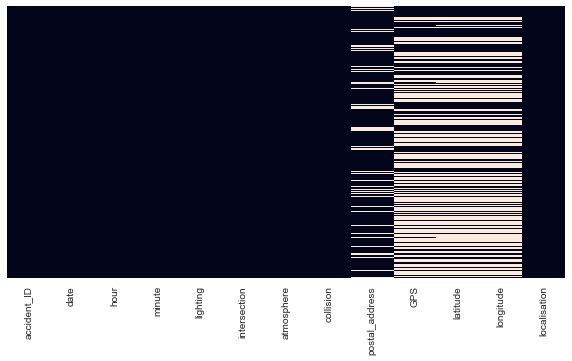

In [351]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

### Handling missing values

In [352]:
# The Lattitude, Longitude and GPS columns can be dropped, as there have over 50% missing values
df.drop(columns=['GPS', 'latitude', 'longitude'], inplace=True)

In [353]:
# Others can be filled with the mode
df['intersection'].fillna(value=df['intersection'].mode()[0], inplace=True)
df['atmosphere'].fillna(value=df['atmosphere'].mode()[0], inplace=True)
df['collision'].fillna(value=df['collision'].mode()[0], inplace=True)
# Can be left blank
df['postal_address'].fillna(value="None", inplace=True)

check_missing_val(df)

In [354]:
df.head()

accident_ID       date hour minute          lighting         intersection  \
0  201600000001 2016-01-02   14     45          Full day  Out of intersection   
1  201600000002 2016-03-16   18     00          Full day             Giratory   
2  201600000003 2016-07-13   19     00          Full day  Out of intersection   
3  201600000004 2016-08-15   19     30  Twilight or dawn  Out of intersection   
4  201600000005 2016-12-23   11     00          Full day       T Intersection   

         atmosphere    collision       postal_address          localisation  
0    Cloudy weather  By the side   46, rue Sonneville     In built-up areas  
1            Normal        Other  1a rue du cimetière     In built-up areas  
2            Normal        Other                 None  Out of agglomeration  
3  Dazzling weather  By the side   52 rue victor hugo     In built-up areas  
4            Normal  By the side     rue Joliot curie     In built-up areas

# Visualizations

In [355]:
sns.set_style("whitegrid")

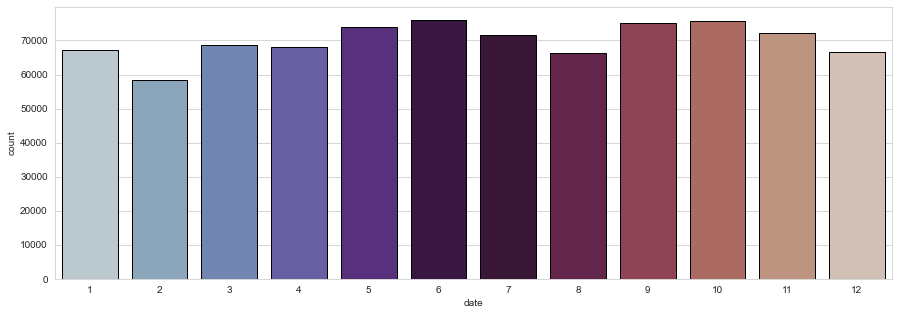

In [356]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["date"].dt.month,
              ec="Black",
              palette="twilight")
plt.show()

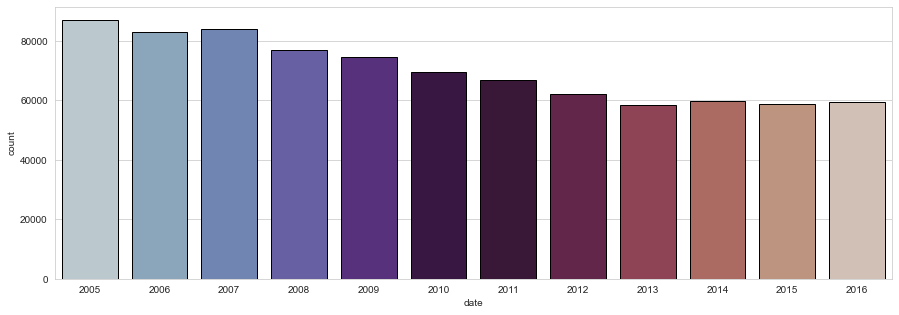

In [357]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["date"].dt.year,
              ec="Black",
              palette="twilight")
plt.show()

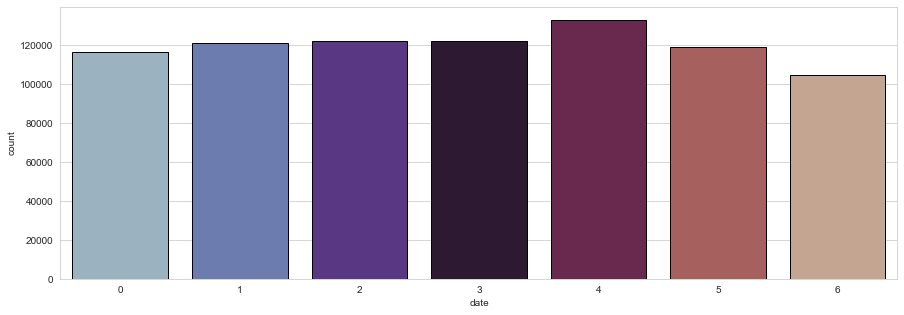

In [358]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["date"].dt.weekday,
              ec="Black",
              palette="twilight")
# Monday=0 
plt.show()

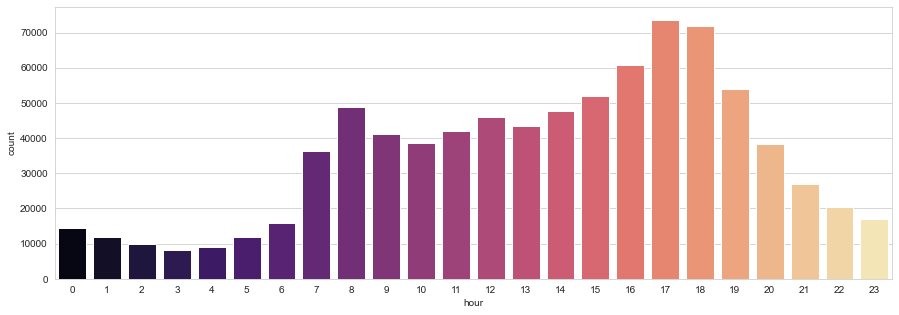

In [359]:
df["hour"] = df["hour"].astype(int)

plt.figure(figsize=(15,5))
sns.countplot(x=df["hour"],
              palette="magma")
# Monday=0 
plt.show()

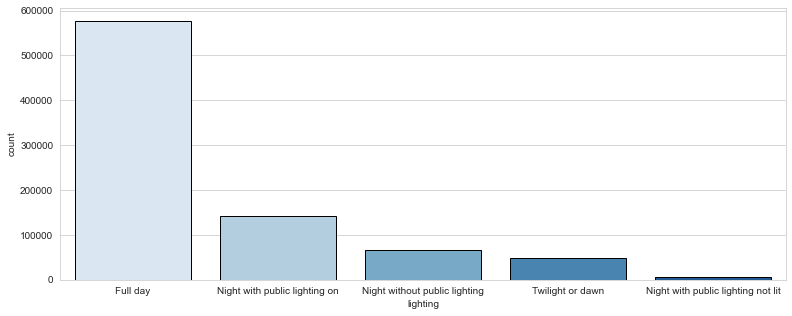

In [360]:
plt.figure(figsize=(13,5))
sns.countplot(x=df["lighting"],
              order=df["lighting"].value_counts().index,
              ec="Black",
              palette="Blues")
plt.show()

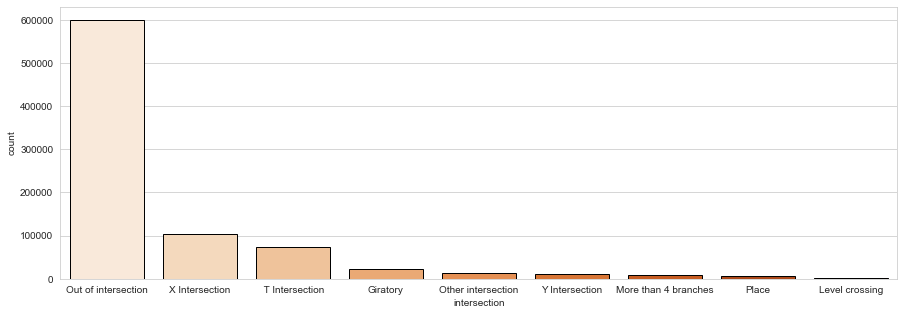

In [361]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["intersection"],
              order=df["intersection"].value_counts().index,
              ec="Black",
              palette="Oranges")
plt.show()

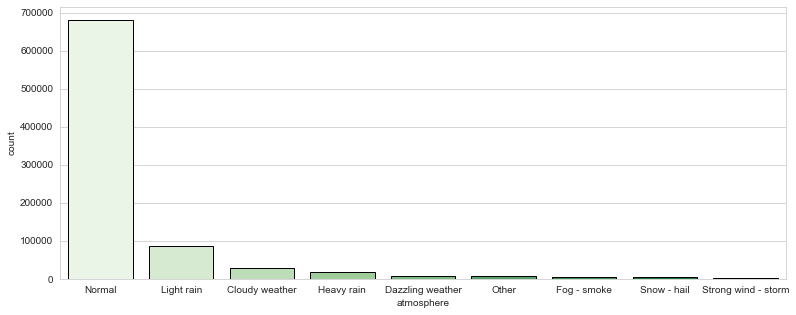

In [362]:
plt.figure(figsize=(13,5))
sns.countplot(x=df["atmosphere"],
              order=df["atmosphere"].value_counts().index,
              ec="Black",
              palette="Greens")
plt.show()

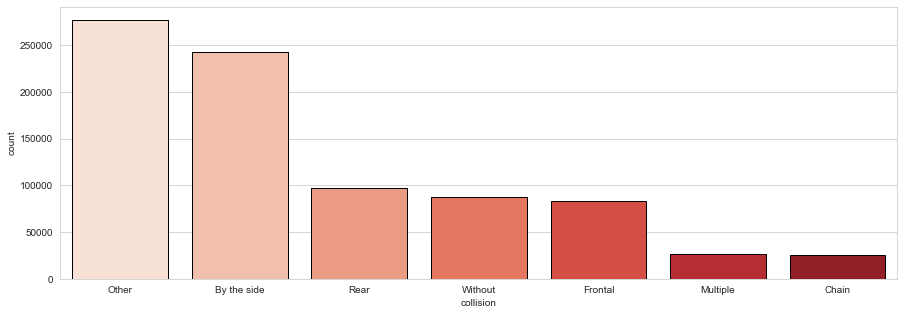

In [363]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["collision"],
              order=df["collision"].value_counts().index,
              ec="Black",
              palette="Reds")
plt.show()

In [364]:
print(df["postal_address"].value_counts()[:20])

None                        140542
AUTOROUTE A1                  2816
AUTOROUTE A86                 2495
A4                            2244
A13                           2164
AUTOROUTE A6                  1990
AUTOROUTE A3                  1966
RN 104                        1906
AUTOROUTE A15                 1819
A86                           1808
ROCADE A 630                  1534
A104                           805
AUTOROUTE A6B                  802
AUTOROUTE A6A                  729
AUTOROUTE A104                 719
RN104                          704
AUTOROUTE A25                  653
AUTOROUTE A10                  626
A7-Sens Lyon vers Marsei       615
RN 118                         609
Name: postal_address, dtype: int64


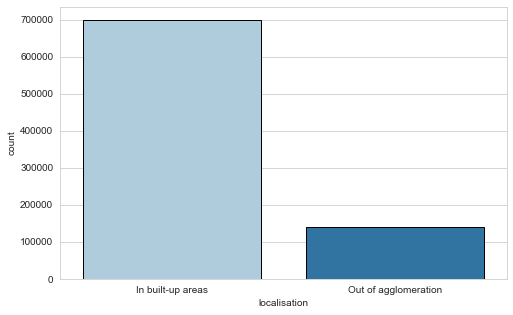

In [365]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["localisation"],
              order=df["localisation"].value_counts().index,
              ec="Black")
plt.show()

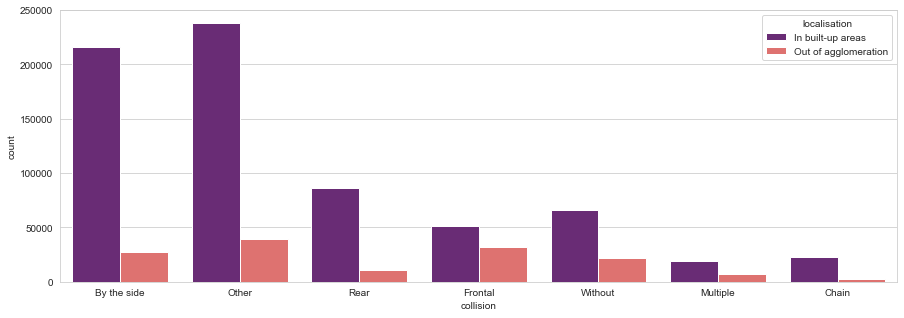

In [366]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["collision"],
              hue=df["localisation"],
              palette="magma")
# Monday=0 
plt.show()

In [375]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [379]:
print(df.columns)

Index(['accident_ID', 'date', 'hour', 'minute', 'lighting', 'intersection',
       'atmosphere', 'collision', 'postal_address', 'localisation'],
      dtype='object')


In [381]:
corr_dict = {}
for column_1 in df.columns[4:8]:
    for column_2 in df.columns[4:8]:
        corr = cramers_v(df[column_1], df[column_2])
        print(f"{column_1} vs {column_2}: {corr}")
        corr_dict[f"{column_1} vs {column_2}"] = corr

lighting vs lighting: 1.0
lighting vs intersection: 0.07788017610493851
lighting vs atmosphere: 0.0921267438067954
lighting vs collision: 0.07871482024247332
intersection vs lighting: 0.0778801761049385
intersection vs intersection: 1.0
intersection vs atmosphere: 0.016834003208478065
intersection vs collision: 0.14776180147351228
atmosphere vs lighting: 0.0921267438067954
atmosphere vs intersection: 0.016834003208478065
atmosphere vs atmosphere: 1.0
atmosphere vs collision: 0.032817776763648075
collision vs lighting: 0.07871482024247332
collision vs intersection: 0.14776180147351228
collision vs atmosphere: 0.032817776763648075
collision vs collision: 1.0


In [386]:
sns.heatmap(pd.DataFrame(corr_dict))

ValueError: If using all scalar values, you must pass an index